# Tutorial: with MIBI dataset

Please follow the paradigm when using SpatialTis:

```python
import spatialtis as st
import spatialtis.plotting as sp
```

- `st` is for analysis
- `sp` is for visualization

In [1]:
%config InlineBackend.figure_format='retina'
import anndata as ad
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import Config

First, let's load the dataset

In [2]:
data = ad.read_h5ad("../data/mibi_TNBC_data.h5ad")
data.obs.head(5)

,Patient,area,cell_shape,centroid,eccentricity,cell_type,Stage
0,Patient 1,405,"((36.0, 149.0), (33.0, 150.0), (31.0, 151.0), ...","(36.32839506172839, 161.80987654320987)",0.846855,Keratin-positive tumor,Stage 3
1,Patient 1,260,"((30.0, 182.0), (29.0, 185.0), (29.0, 196.0), ...","(37.88076923076923, 190.15769230769232)",0.742389,CD3 T,Stage 3
2,Patient 1,170,"((29.0, 198.0), (29.0, 211.0), (30.0, 211.0), ...","(35.029411764705884, 203.74117647058824)",0.583451,Keratin-positive tumor,Stage 3
3,Patient 1,275,"((32.0, 212.0), (29.0, 213.0), (29.0, 232.0), ...","(34.443636363636365, 224.22545454545454)",0.870150,Keratin-positive tumor,Stage 3
4,Patient 1,860,"((51.0, 239.0), (33.0, 242.0), (31.0, 243.0), ...","(44.25581395348837, 254.9279069767442)",0.325646,B,Stage 3


The `centroid` or the `cell_shape` is not `wkt` format used by spatialtis, we need to transform it. The transformation will automatically set the corresponding configurations for you.

In [56]:
st.transform_points(data, 'centroid', export_key='wkt_centroid')
st.transform_shapes(data, 'cell_shape', export_key='wkt_shape')

SpatialTis has a global configuration system to free user from repeatedly typing the same information.

Most of the configurations is to tell spatialtis the columns of related info.

Make sure you set `Config.roi_key` explicitly.

In [6]:
Config.marker_key = 'markers'
Config.exp_obs = ["Stage", "Patient"]
Config.roi_key = "Patient"
Config.cell_type_key = 'cell_type'

Let's check the current config

In [7]:
Config.view()

               Current configurations of SpatialTis               
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Options                 ┃ Attributes    ┃ Value                ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ Multiprocessing         │ mp            │ True                 │
│ Verbose                 │ verbose       │ True                 │
│ Progress bar            │ progress_bar  │ False                │
│ Auto save               │ auto_save     │ False                │
│ Experiment observations │ exp_obs       │ ['Stage', 'Patient'] │
│ ROI key                 │ roi_key       │ Patient              │
│ Cell type key           │ cell_type_key │ cell_type            │
│ Marker key              │ marker_key    │ markers              │
│ Centroid key            │ centroid_key  │ wkt_centroid         │
│ Shape key               │ shape_key     │ wkt_shape            │
└─────────────────────────┴───────────────┴──────────────────────┘

SpatialTis could help you save your visualization results automatically. By simply setting the following

```python
Config.auto_save = True  # save to default dir
Config.auto_save = "my_result_directory"  # save to custom dir
```


In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:>

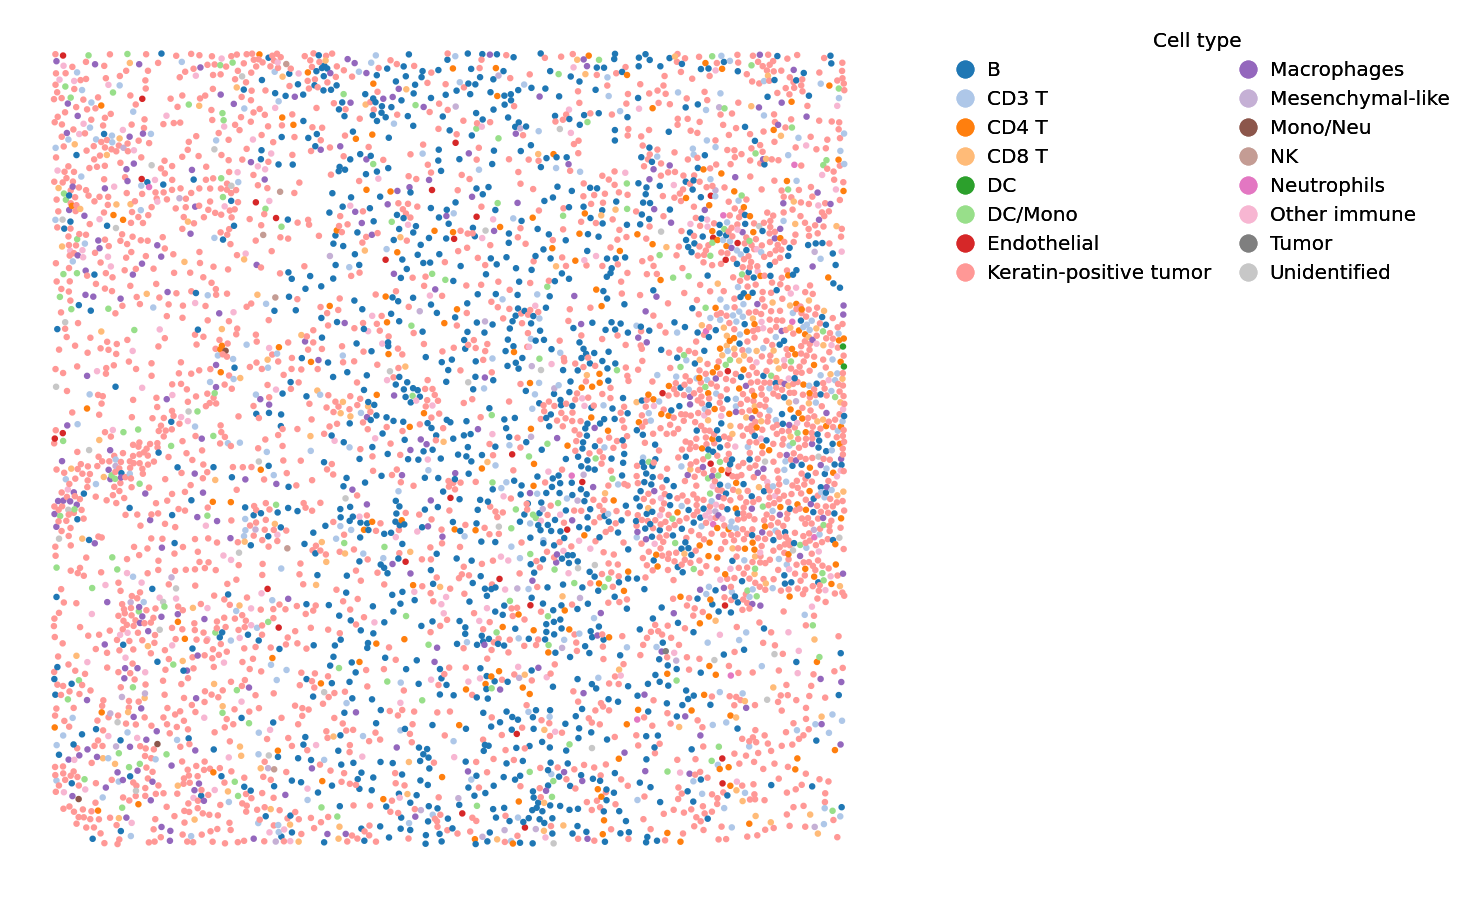

In [36]:
_, ax = plt.subplots(figsize=(13, 8))
sp.cell_map(data, 'Patient 1', ax=ax)

<AxesSubplot:>

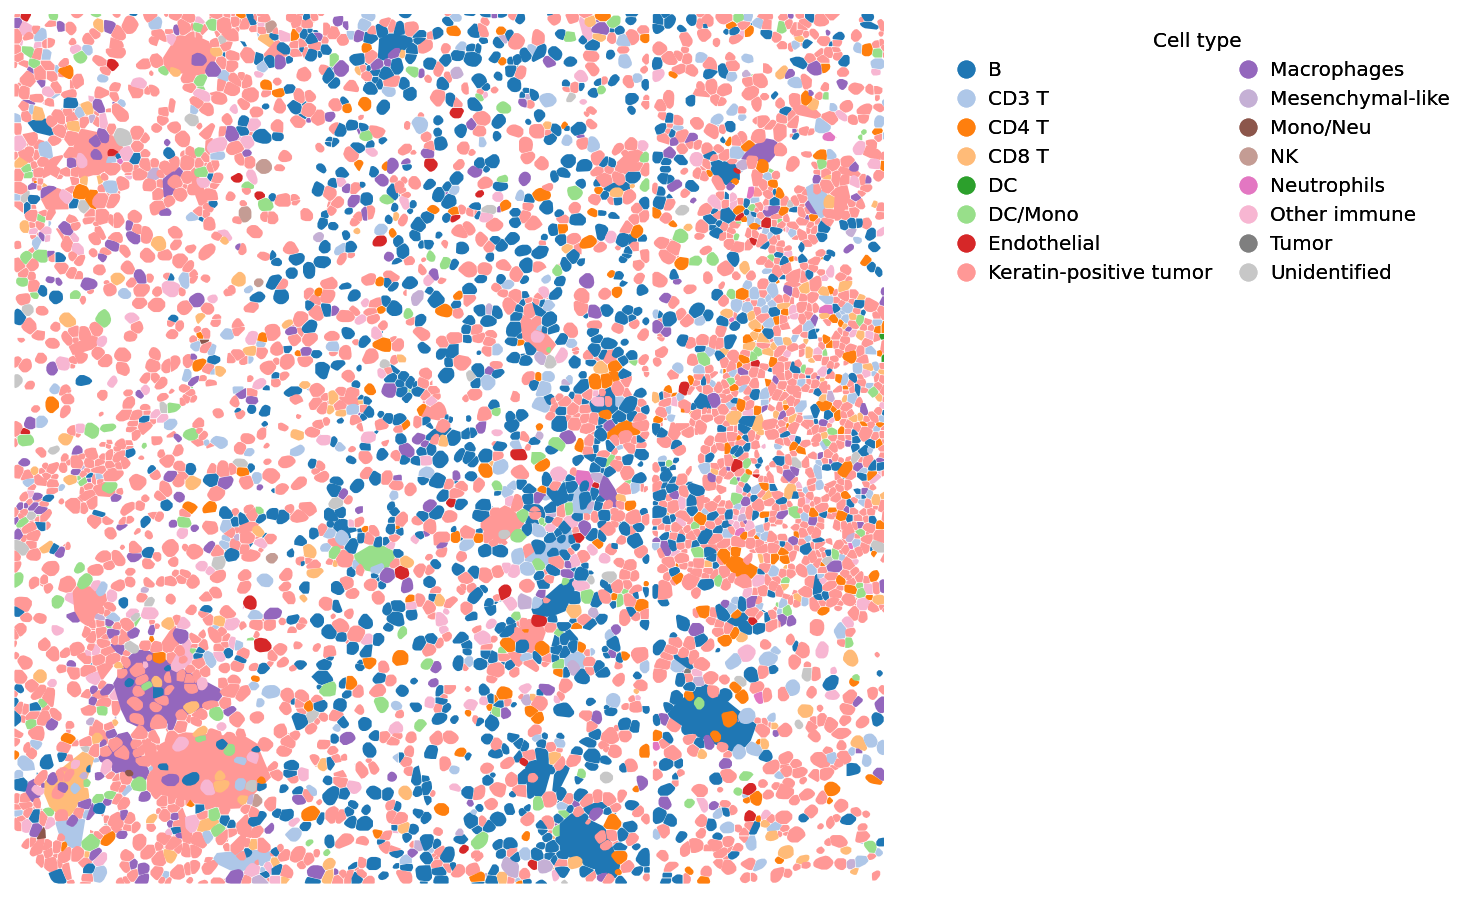

In [37]:
_, ax = plt.subplots(figsize=(13, 8))
sp.cell_map(data, 'Patient 1', use_shape=True, ax=ax)

Now taht we are prepared, We could start off some analysis

In [8]:
_ = st.cell_components(data)

⏳ Cell components

📦 Added to AnnData, uns: 'cell_components'

⏱ 373ms

If you don't like these information to be printed. Set

```python
Config.verbose = False
```

<AxesSubplot:xlabel='Stage', ylabel='count'>

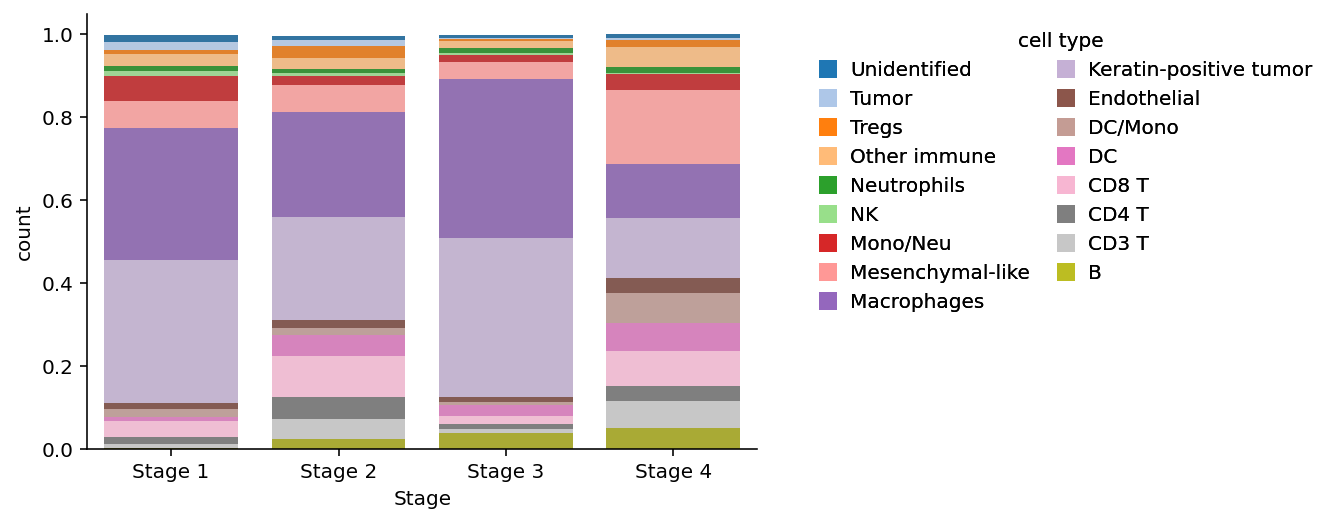

In [24]:
sp.cell_components(data, percentage=True)

In [12]:
_ = st.cell_density(data)

⏳ Cell density

📦 Added to AnnData, uns: 'cell_density'

⏱ 801ms

<AxesSubplot:xlabel='cell type', ylabel='density'>

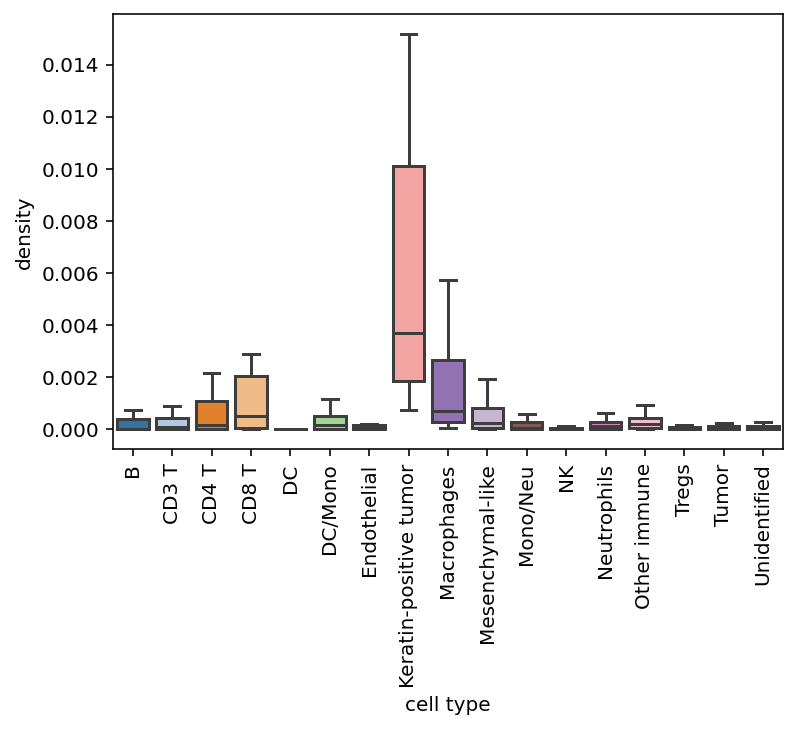

In [23]:
sp.cell_density(data, showfliers=False)

In [38]:
_ = st.cell_morphology(data)

⏳ Cell morphology

📦 Added to AnnData, obs: 'area'

📦 Added to AnnData, obs: 'eccentricity'

⏱ 2s720ms

In [ ]:
sp.cell_morphology(data, 'area', showfliers=False)

In [ ]:
sp.cell_morphology(data, 'eccentricity', showfliers=False)

In [49]:
_ = st.find_neighbors(data, r=40, k=6)

⏳ Find neighbors

🛠 Method: kdtree

📦 Added to AnnData, obs: 'cell_neighbors'

📦 Added to AnnData, obs: 'cell_neighbors_count'

⏱ 1s438ms

<AxesSubplot:>

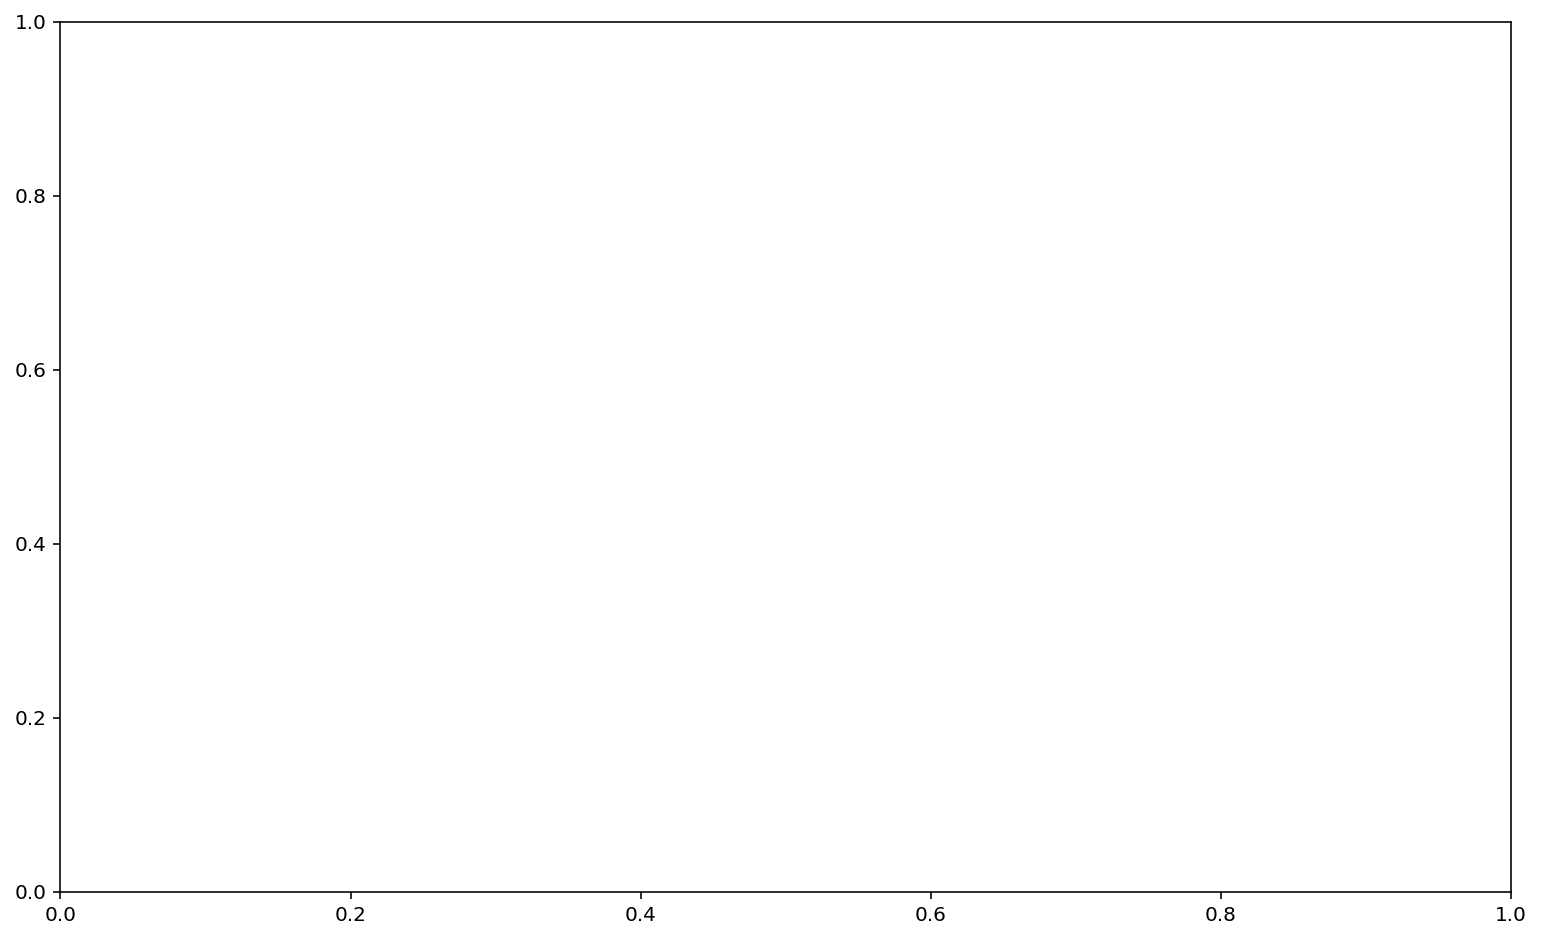

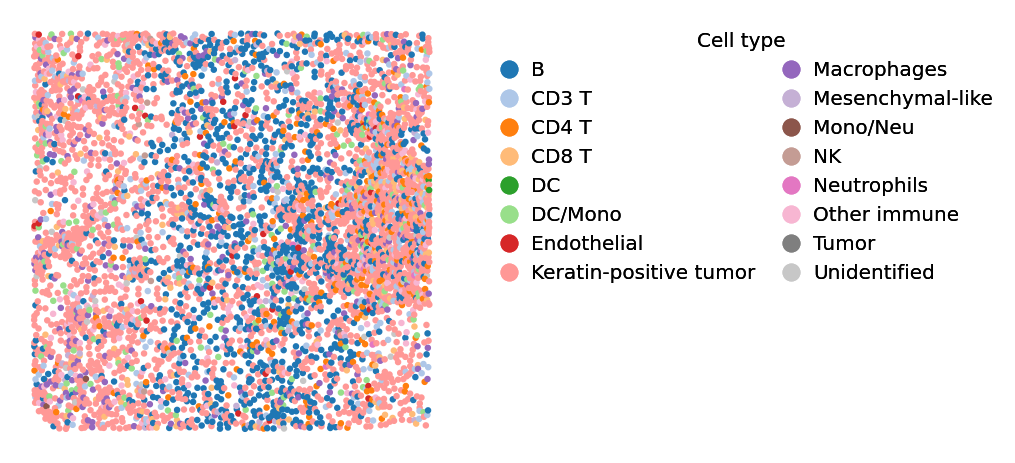

In [44]:
_, ax = plt.subplots(figsize=(13, 8))
sp.neighbors_map(data, 'Patient 1', ax=ax)

In [50]:
_ = st.cell_interaction(data)

⏳ Cell interaction

📦 Added to AnnData, uns: 'cell_interaction'

⏱ 6s855ms

<AxesSubplot:>

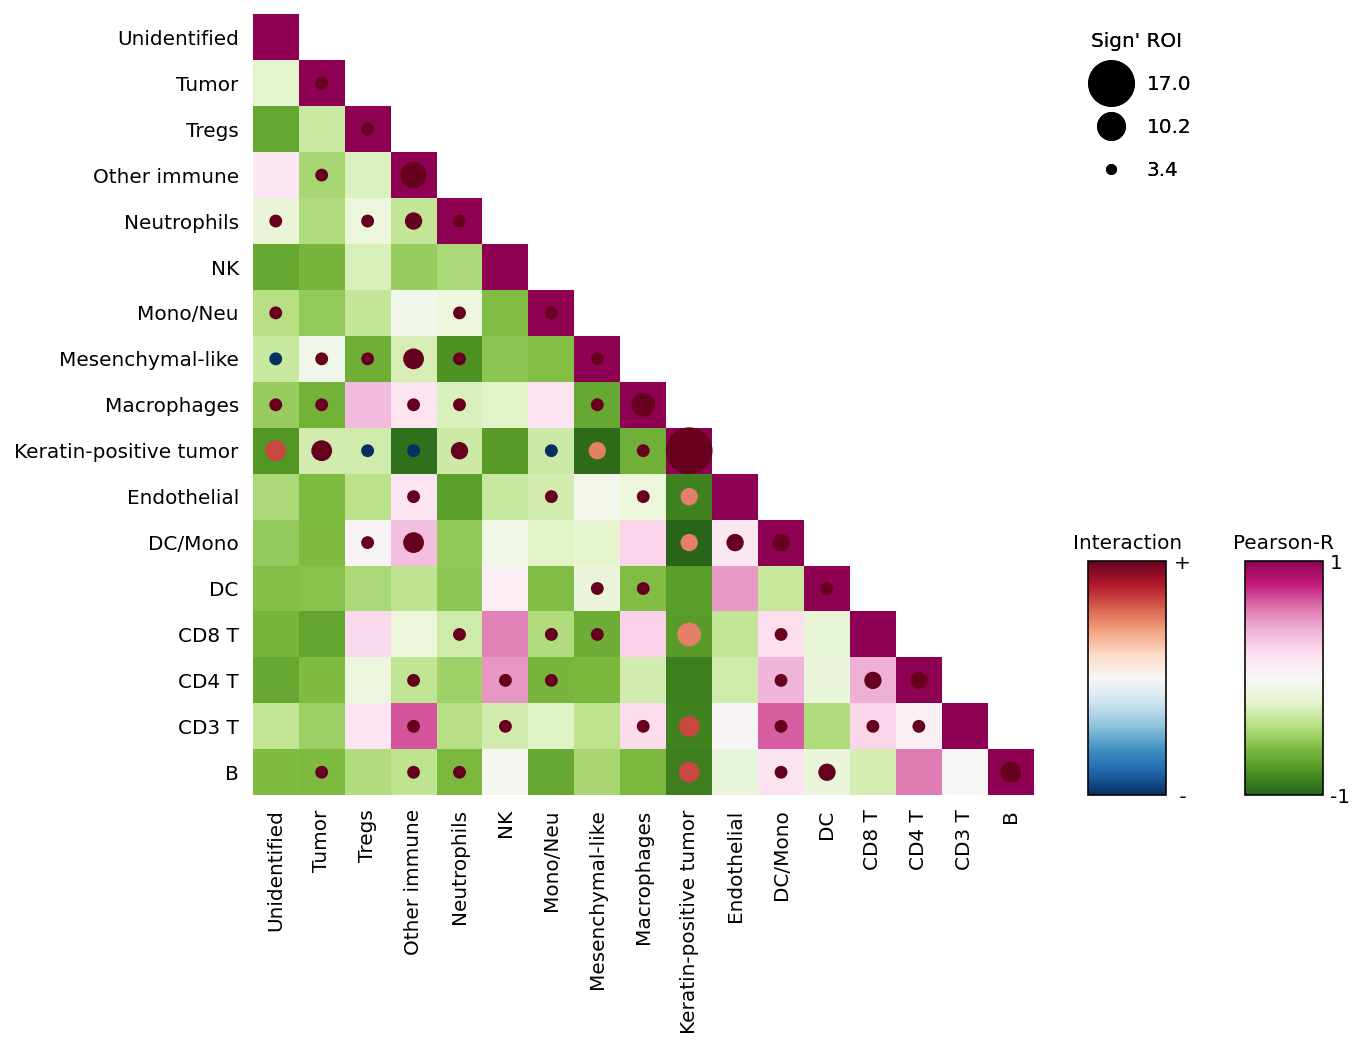

In [52]:
sp.cell_interaction(data, order=False)

In [53]:
st.spatial_enrichment(data)

⏳ Spatial enrichment

KeyboardInterrupt: 